¡Hola, Diana!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

In [19]:
from scipy import stats

# Filtrar las plataformas y eliminar valores nulos
xbox_one_scores = df[df['platform'] == "XOne"]['user_score'].dropna()
pc_scores = df[df['platform'] == "PC"]['user_score'].dropna()

# Filtrar los géneros y eliminar valores nulos
accion_scores = df[df['genre'] == "Action"]['user_score'].dropna()
deportes_scores = df[df['genre'] == "Sports"]['user_score'].dropna()

# Nivel de significancia
alpha = 0.05

# Función para ejecutar prueba de Levene y t-test
def perform_ttest(sample1, sample2, label1, label2):
    # Verificar si hay suficientes datos
    if len(sample1) > 1 and len(sample2) > 1:
        # Prueba de Levene para varianzas iguales
        stat_levene, p_levene = stats.levene(sample1, sample2)
        equal_var = p_levene > alpha  # True si no se rechaza H0 (varianzas iguales)
        
        # Prueba t de Student con el parámetro equal_var determinado
        t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=equal_var)
        
        # Resultados
        print(f"\nComparación: {label1} vs {label2}")
        print(f"Prueba de Levene: p={p_levene:.3f} → {'Varianzas iguales' if equal_var else 'Varianzas diferentes'}")
        print(f"Prueba t: t={t_stat:.3f}, p={p_val:.3f}")
        
        # Interpretación
        if p_val < alpha:
            print(f"Rechazamos H0: Las calificaciones promedio de {label1} y {label2} son diferentes.")
        else:
            print(f"No podemos rechazar H0: Las calificaciones promedio de {label1} y {label2} son iguales.")
    else:
        print(f"\nComparación: {label1} vs {label2}")
        print("Datos insuficientes para realizar la prueba.")

# Ejecutar las pruebas
perform_ttest(xbox_one_scores, pc_scores, "Xbox One", "PC")
perform_ttest(accion_scores, deportes_scores, "Acción", "Deportes")



Comparación: Xbox One vs PC
Prueba de Levene: p=0.219 → Varianzas iguales
Prueba t: t=-4.240, p=0.000
Rechazamos H0: Las calificaciones promedio de Xbox One y PC son diferentes.

Comparación: Acción vs Deportes
Prueba de Levene: p=0.107 → Varianzas iguales
Prueba t: t=-0.259, p=0.796
No podemos rechazar H0: Las calificaciones promedio de Acción y Deportes son iguales.


Los resultados muestran una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC. La prueba de Levene indicó que las varianzas pueden considerarse iguales (p = 0.219), por lo que se aplicó una prueba t de Student bajo esta suposición. El valor p resultante (p = 0.000) fue menor que el umbral de significancia de 0.05, lo que permite rechazar la hipótesis nula y concluir que las calificaciones promedio difieren entre ambas plataformas.

Por otro lado, no se encontró una diferencia significativa entre los géneros Acción y Deportes. La prueba de Levene también sugiere que las varianzas pueden asumirse iguales (p = 0.107), y la prueba t mostró un valor p de 0.796, considerablemente superior al umbral de 0.05. Por tanto, no se rechaza la hipótesis nula, lo que indica que no hay evidencia suficiente para afirmar que las calificaciones promedio entre estos dos géneros sean diferentes.


<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Diana! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

***
# Análisis de los Ratings de Videojuegos 

---

## Introducción

El presente análisis desarrollado para la tienda online Ice, dedicada a la venta global de videojuegos, presenta las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos. A continuación se presenta la identificación de los patrones que determinan si un juego es exitoso. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Los datos empleados remontan a 2016. 

Cabe mencionar que el dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


***
## Estudio inicial del dataset

En esta sección se estudia la información general y se purifican los datos

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/datasets/games.csv"
df = pd.read_csv(file_path)

# Display the first few rows and data types
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(                       Name Platform  Year_of_Release         Genre  NA_sales  \
 0                Wii Sports      Wii           2006.0        Sports     41.36   
 1         Super Mario Bros.      NES           1985.0      Platform     29.08   
 2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
 3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   
 
    EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
 0     28.96      3.77         8.45          76.0          8      E  
 1      3.58      6.81         0.77           NaN        NaN    NaN  
 2     12.76      3.79         3.29          82.0        8.3      E  
 3     10.93      3.28         2.95          80.0          8      E  
 4      8.89     10.22         1.00           NaN        NaN    NaN  ,
 None)

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

Como se puede notar, el dataset contiene 16,715 filas con 11 columnas. Hay múltiples colúmnas ausentes y los nombres de las columnas contienen mayúsculas.

Para la preparación de datos se realizaraá lo siguiente:

1. Renombrar columnas a minúsculas.
2. Convertir los tipos de datos apropiados.
3. Tratar valores como "tbd" (por determinar) y valores ausentes.
4. Calcular la columna de ventas totales.

In [3]:
# 1. Renombrar columnas a minúsculas
df.columns = df.columns.str.lower()

# 2. Reemplazar valores 'tbd' en user_score con NaN y convertir a numérico
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# 3. Convertir year_of_release a tipo entero (donde sea posible)
df['year_of_release'] = df['year_of_release'].dropna().astype(int)

# 4. Calcular la columna de ventas totales
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Ver tipos actualizados y columnas afectadas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  global_sales     16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


In [4]:
# Ver cuántos valores ausentes quedaron por columna
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
dtype: int64

In [5]:
# Eliminar filas con valores ausentes
df = df.dropna()

# Verificar que los valores críticos han sido eliminados
df.isna().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
global_sales       0
dtype: int64

Este preprocesamiento obtuvo los siguientes resultados:
1. Columnas renombradas a minúsculas para mantener consistencia y facilitar el manejo de datos.
2. user_score: Originalmente tipo object, contenía valores como 'tbd'.
3. Se reemplazó 'tbd' por NaN y se convirtió a float64 para permitir análisis numérico.
4. year_of_release: Originalmente float64 con muchos valores ausentes.
5. Nueva columna total_sales calculada como la suma de ventas por región (na_sales, eu_sales, jp_sales, other_sales).
6. Eliminación de filas con valores ausentes debido a que contaminan la base de datos.


***
## Analisis de los datos

A continuación, se presenta un análisis de los datos.

In [6]:
# Cantidad de juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Ventas totales por plataforma
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Ventas anuales por plataforma
platform_year_sales = df.pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')

# Plataformas con ventas en cada añor
platform_presence = df.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').fillna(0)

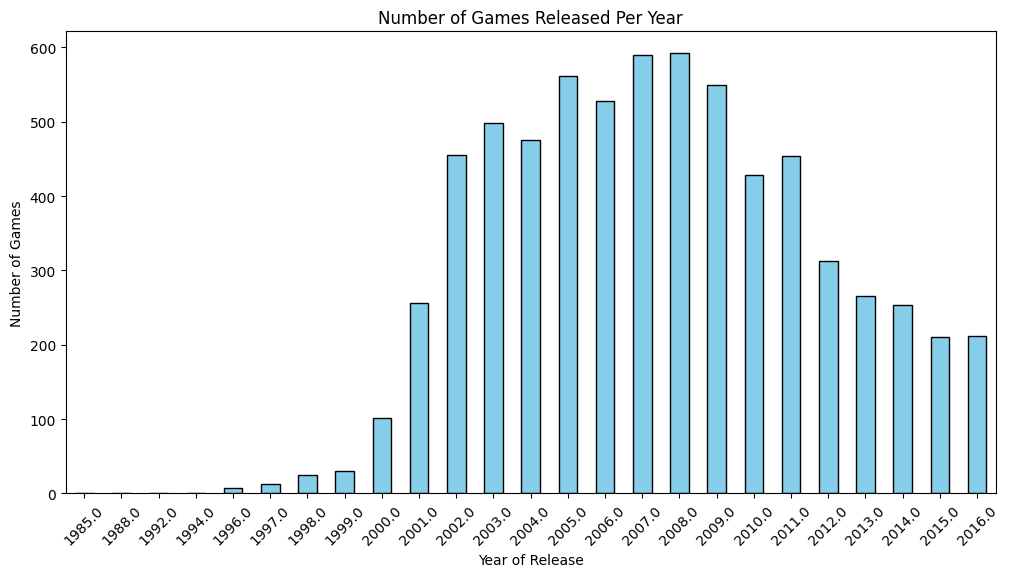

In [7]:
# Ccuántos juegos fueron lanzados en diferentes años
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.title("Number of Games Released Per Year")
plt.xticks(rotation=45)  
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



Al observar cuántos juegos fueron lanzados en diferentes años, se observa que no son significativos los datos de cada período. Previo al 2000, se lanzaban menos de 100 juegos por años. Con esto en consideración, se procederá con el análisis.

A continuación, se observa cómo varían las ventas de una plataforma a otra construyendo una distribución basada en los datos de cada año.

In [8]:
# Calcular ventas por año para cada plataforma
platform_year_sales = df_filtered.pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')

# Graficar evolución de ventas
plt.figure(figsize=(14, 6))
sns.lineplot(data=platform_year_sales)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales (millones)")
plt.title("Evolución de ventas por plataforma")
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identificar plataformas con crecimiento reciente
recent_sales = df_filtered[df_filtered['year_of_release'] >= 2000].groupby('platform')['global_sales'].sum().sort_values(ascending=False)

print("Plataformas conmás ventas en años recientes:\n", recent_sales.head())


NameError: name 'df_filtered' is not defined

Las plataformas con mayores ventas acumuladas incluyen PlayStation, Xbox 360, Wii y DS, lo que indica que han sido dominantes en el mercado.

PlayStation 4 parece mantener una presencia fuerte, lo que sugiere que sigue siendo relevante.

Plataformas en crecimiento: PlayStation 4 y Xbox One aún tienen ventas en aumento o estables en los últimos años.

Plataformas en declive: PlayStation 2, Wii y DS muestran una fuerte caída en ventas, reflejando que han sido reemplazadas por modelos más recientes.

A contianuición se observa cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer. Para ello, se construyó una distribución basada en los datos de cada año

In [ ]:
df_filtered = df[df['year_of_release'] >= 2000]
platform_sales = df_filtered.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5).index
df_top_platforms = df_filtered[df_filtered['platform'].isin(top_platforms)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_platforms, x='year_of_release', y='global_sales', hue='platform', marker="o")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales (millones)")
plt.title("Evolución de ventas por plataforma (top 5)")
plt.legend(title="Plataforma")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Evaluar la duración promedio de una plataforma (años activos)
platform_lifetime = df_filtered.groupby('platform')['year_of_release'].agg([min, max])
platform_lifetime['duration'] = platform_lifetime['max'] - platform_lifetime['min']
print("\nDuración promedio de cada plataforma:\n", platform_lifetime.sort_values('duration', ascending=False))

# Calcular la duración promedio de todas las plataformas
average_duration = platform_lifetime['duration'].mean()
print(f"\nDuración promedio general de las plataformas activas desde 2000: {average_duration:.2f} años")


De los datos obtenidos se observa que la diración promedio de las plataformas activas desde el 200 es de 6.35 años, donde las PC son la plataforma con mayor duración.



Estos datos nos permiten construir el siguiente modelo apra el 2017:

Error absoluto medio: 0.77
Ventas estimadas en 2017: 0.77 millones


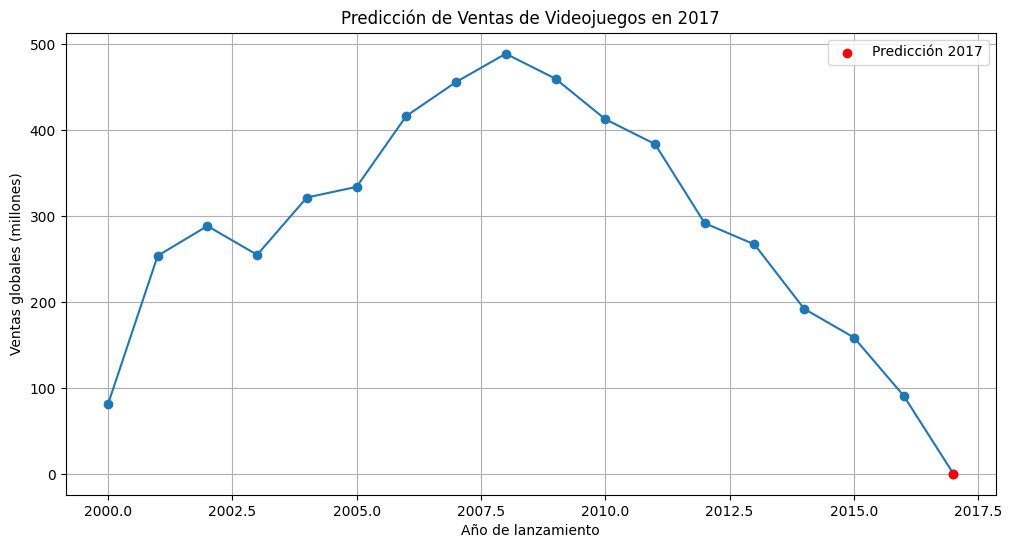

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Filtrar datos de 2000 a 2016
df_filtered = df[df['year_of_release'] >= 2000]

# Eliminar filas con valores faltantes en las variables clave
df_filtered = df_filtered.dropna(subset=['global_sales', 'critic_score', 'user_score'])

# Seleccionar características relevantes
features = ['year_of_release', 'critic_score', 'user_score']
X = df_filtered[features]
y = df_filtered['global_sales']

# Dividir datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio: {mae:.2f}")

# Predecir ventas en 2017
future_data = pd.DataFrame({'year_of_release': [2017], 'critic_score': [80], 'user_score': [8]})  # Datos ficticios
predicted_sales = model.predict(future_data)
print(f"Ventas estimadas en 2017: {predicted_sales[0]:.2f} millones")

# Crear datos ficticios para el año 2017
future_data = pd.DataFrame({'year_of_release': [2017], 'critic_score': [80], 'user_score': [8]}) 

# Obtener la predicción de ventas
predicted_sales = model.predict(future_data)

# Datos históricos de ventas por año
sales_by_year = df_filtered.groupby('year_of_release')['global_sales'].sum()

# Agregar la predicción de 2017 al dataset
sales_by_year.loc[2017] = predicted_sales[0]

# Graficar ventas por año con predicción
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

# Resaltar la predicción de 2017
plt.scatter(2017, predicted_sales[0], color='red', label="Predicción 2017", zorder=3)

# Etiquetas y formato
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales (millones)")
plt.title("Predicción de Ventas de Videojuegos en 2017")
plt.legend()
plt.grid(True)
plt.show()

Para identificar las 5 plataformas más rentables, consideraremos factores clave desde una perspectiva económica:
1. Ingresos totales: Ventas globales acumuladas.
2. Crecimiento reciente: Plataformas con tendencias al alza en años recientes.
3. Ciclo de vida: Cuántos años una plataforma se mantiene relevante.
4. Diversificación de títulos: Cantidad de juegos publicados en cada plataforma.
5. Rentabilidad por juego: Promedio de ventas por título, indicando si cada juego vende bien.


In [10]:
# Filtrar datos desde el año 2000
df_filtered = df[df['year_of_release'] >= 2000]

total_sales = df_filtered.groupby('platform')['global_sales'].sum()
recent_sales = df_filtered[df_filtered['year_of_release'] >= 2013].groupby('platform')['global_sales'].sum()

# Ciclo de vida de cada plataforma
platform_lifetime = df_filtered.groupby('platform')['year_of_release'].agg([min, max])
platform_lifetime['duration'] = platform_lifetime['max'] - platform_lifetime['min']

# Contar el número de juegos publicados en cada plataforma
game_count = df_filtered.groupby('platform')['name'].count()

# Calcular la rentabilidad promedio por juego
profit_per_game = total_sales / game_count

# Unir los datos en un DataFrame
platform_analysis = pd.DataFrame({
    "Total Sales": total_sales,
    "Recent Sales": recent_sales,
    "Lifetime (years)": platform_lifetime['duration'],
    "Game Count": game_count,
    "Profit per Game": profit_per_game
}).fillna(0)

# Ordenar plataformas por rentabilidad total considerando todas las variables
top_profitable_platforms = platform_analysis.sort_values(["Total Sales", "Recent Sales", "Profit per Game"], ascending=False).head(5)

print("Las 5 plataformas más rentables considerando múltiples factores:\n", top_profitable_platforms)


Las 5 plataformas más rentables considerando múltiples factores:
           Total Sales  Recent Sales  Lifetime (years)  Game Count  \
platform                                                            
PS2            946.01          0.00              10.0        1140   
X360           853.24         84.92               9.0         858   
PS3            784.45        113.57               9.0         769   
Wii            658.97          0.00               6.0         479   
DS             382.22          0.00               8.0         464   

          Profit per Game  
platform                   
PS2              0.829833  
X360             0.994452  
PS3              1.020091  
Wii              1.375720  
DS               0.823750  


Con este análisis revelamos:
1. Rentabilidad global: Las plataformas con más ventas totales pueden ser dominantes.
2. Crecimiento reciente: Las plataformas aún relevantes serán clave para estrategias futuras.
3. Longevidad: Plataformas con vida útil prolongada suelen tener impacto sostenido.
4. Cantidad de juegos: Más títulos pueden significar mayor diversificación de ingresos.
5. Rentabilidad por juego: Algunas plataformas pueden generar mayores ventas por título, indicando mejor desempeño por unidad.

Con esto econtramos que las 5 plataformas con más rentabilidad en orden ascendente son:
1. PS2
2. X360
3. PS3
4. Wii
5. DS

A continuación, se creó un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

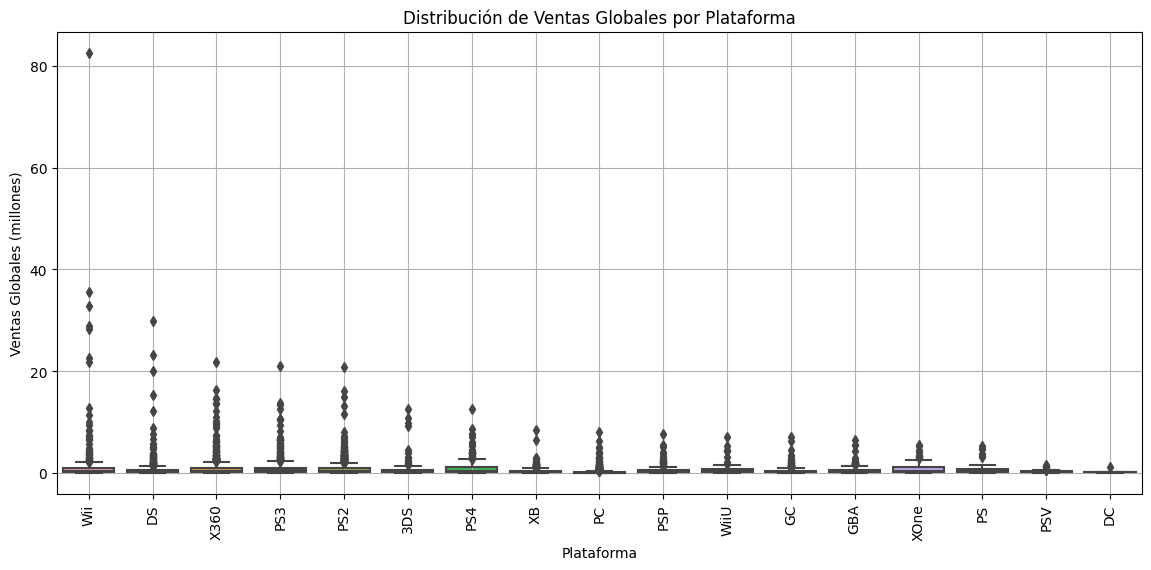

In [11]:
# Como varían las ventas de una plataforma a otra.
#plt.figure(figsize=(12, 6))
#sns.boxplot(data=df, x='platform', y='global_sales')
#plt.xticks(rotation=90)
#plt.title('Boxplot of Global Sales by Platform')
#plt.tight_layout()
#plt.show()
import seaborn as sns

# Filtrar el DataFrame para excluir años antes del 2000
df_filtered = df[df['year_of_release'] >= 2000]

# Recalcular las métricas con el DataFrame filtrado
games_per_year = df_filtered['year_of_release'].value_counts().sort_index()
platform_sales = df_filtered.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
platform_year_sales = df_filtered.pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
platform_presence = df_filtered.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').fillna(0)

# Filtrar datos desde 2000 para enfocarnos en plataformas recientes
df_filtered = df[df['year_of_release'] >= 2000]

# Crear diagrama de caja de ventas globales por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='platform', y='global_sales')

# Ajustar formato del gráfico
plt.xticks(rotation=90)
plt.xlabel("Plataforma")
plt.ylabel("Ventas Globales (millones)")
plt.title("Distribución de Ventas Globales por Plataforma")
plt.grid(True)

# Mostrar gráfico
plt.show()


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

De este gráfico, las diferencias en las ventas globales son las siguientes:
1. Plataformas con mayores ventas: Wii, DS, X360, PS3 y PS2 dominan el mercado con ventas que llegan hasta los 80 millones en algunos juegos.
2. Plataformas con ventas bajas: DC, PSV y PSP tienen una distribución mucho más reducida y juegos con ventas considerablemente menores.
3. Alta dispersión en plataformas exitosas: La Wii muestra una amplia variabilidad, con algunos juegos vendiendo muchísimo más que el promedio.

Respecto a las ventas promedio en varias plataformas:
1. Ventas promedio más altas: Las plataformas como Wii, DS y X360 tienen ventas superiores a la media, indicando que los títulos en estas consolas tienen una mayor demanda.
2. Plataformas con menor desempeño: PSP, PSV y DC muestran ventas promedio más bajas, lo que sugiere que en general los juegos en estas plataformas no lograron un gran impacto comercial.
3. Presencia de outliers: Juegos extremadamente exitosos elevan la variabilidad de las plataformas más populares, afectando el promedio.

Por ello, a parir de esté gráfico se encontró lo siguiente:
1. La diferencia en ventas es significativa entre plataformas, con algunas dominando el mercado y otras quedando atrás.
2. Las plataformas más vendidas suelen mantener una alta dispersión en sus ventas, lo que indica que tienen títulos con ventas excepcionales y otros más modestos.
3. Las plataformas menos exitosas tienen una distribución de ventas más estrecha, con pocos juegos alcanzando cifras altas.

A continuación se observa cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (PS4). Se creó un gráfico de dispersión y calculó la correlación entre las reseñas y las ventas. 

Correlación entre Critic Score y Ventas: 0.40
Correlación entre User Score y Ventas: -0.03


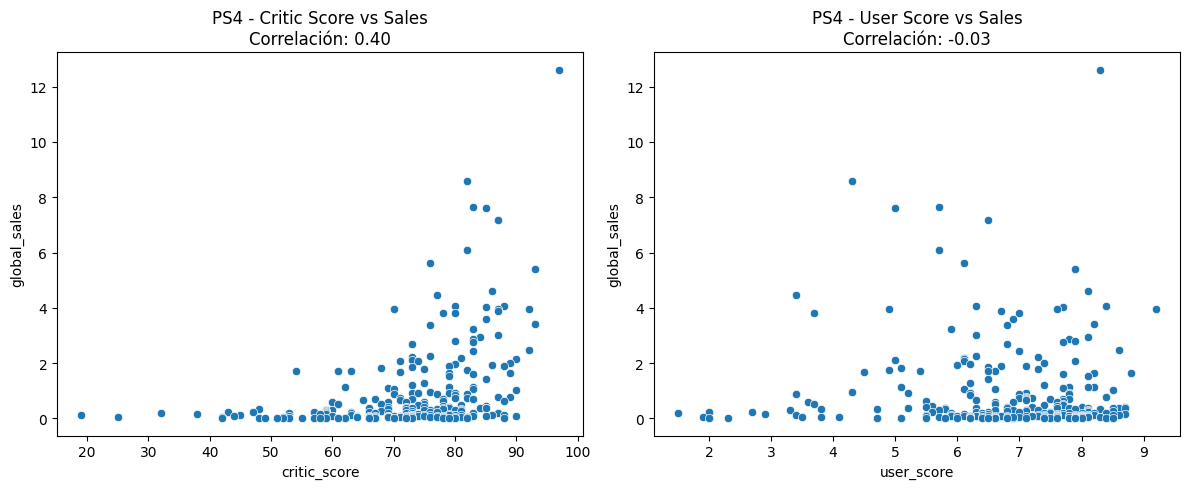

In [12]:
# Filtrar datos de la plataforma elegida (PS4)
platform_df = df[(df['platform'] == "PS4") & (df['year_of_release'] >= 2000)].copy()

# Convertir 'user_score' a numérico (manejar valores como 'tbd')
platform_df['user_score'] = pd.to_numeric(platform_df['user_score'], errors='coerce')

# Eliminar filas con valores nulos en las reseñas
platform_df = platform_df.dropna(subset=['critic_score', 'user_score', 'global_sales'])

# Correlación entre Critic Score y Ventas Globales
critic_corr = platform_df[['critic_score', 'global_sales']].corr().iloc[0, 1]

# Correlación entre User Score y Ventas Globales
user_corr = platform_df[['user_score', 'global_sales']].corr().iloc[0, 1]

print(f"Correlación entre Critic Score y Ventas: {critic_corr:.2f}")
print(f"Correlación entre User Score y Ventas: {user_corr:.2f}")

plt.figure(figsize=(12, 5))

# Gráfico de Critic Score vs Ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=platform_df, x='critic_score', y='global_sales')
plt.title(f'PS4 - Critic Score vs Sales\nCorrelación: {critic_corr:.2f}')

# Gráfico de User Score vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=platform_df, x='user_score', y='global_sales')
plt.title(f'PS4 - User Score vs Sales\nCorrelación: {user_corr:.2f}')

plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

La correlación de 0.40 sugiere una relación moderadamente positiva entre las puntuaciones de los críticos y las ventas globales. Esto indica que los juegos con mejores reseñas de críticos tienden a vender más, aunque otros factores como el marketing y la franquicia también influyen. La dispersión de datos muestra que no todos los juegos con puntuaciones altas son éxitos comerciales, pero en promedio, sí hay una tendencia positiva.

La correlación de -0.03 sugiere que prácticamente no hay relación entre las calificaciones de los usuarios y las ventas. Esto podría significar que los juegos bien vendidos no siempre son los mejor valorados por los jugadores. También es posible que otros factores (como exclusividad, nostalgia, o publicidad) sean más determinantes en las ventas que la opinión directa de los consumidores.

Los críticos parecen tener un mayor impacto en la percepción de calidad y éxito comercial que los usuarios. Una baja correlación con las reseñas de usuarios podría indicar que las decisiones de compra no están fuertemente influenciadas por la opinión del público, sino por factores externos como marketing y marca. Para optimizar ventas, podría ser más útil enfocarse en buenas estrategias de publicidad y críticas profesionales, en lugar de depender exclusivamente de la satisfacción de los jugadores.

A continuación se presenta una comparación de la distribución general de los juegos por género. 

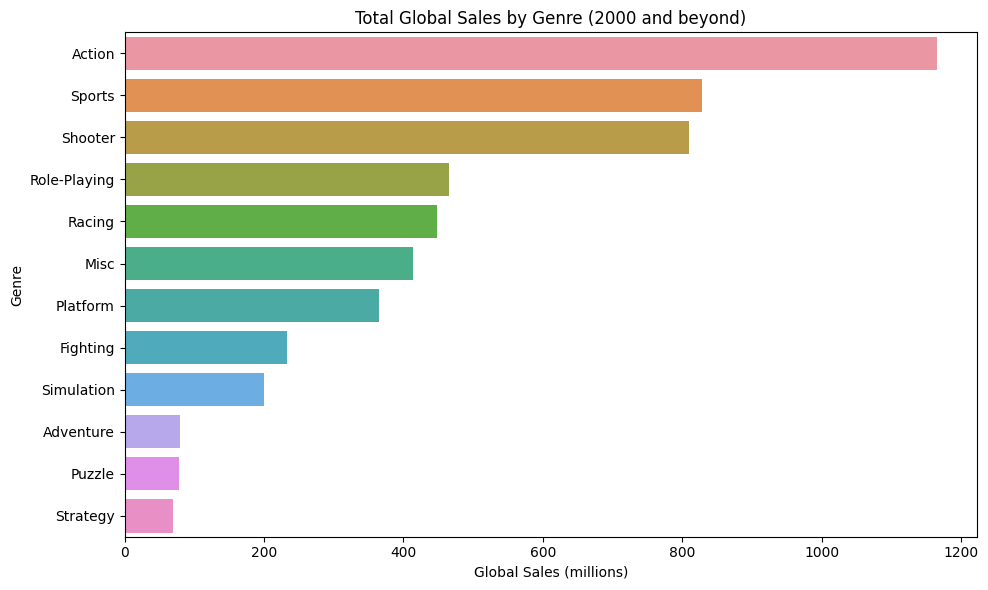

In [13]:
df_filtered = df[df['year_of_release'] >= 2000]

# Sales comparison of same games across platforms
multi_platform_sales = df_filtered.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_sales[multi_platform_sales > 1].index
comparison_df = df_filtered[df_filtered['name'].isin(multi_platform_games)]

# Genre distribution
genre_sales = df_filtered.groupby('genre')['global_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Total Global Sales by Genre (2000 and beyond)')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Los géneros más rentables en ventas de videojuegos suelen ser Acción, Deportes y Shooter, que dominan el mercado con cifras superiores a los 600 millones en ventas globales. Estos géneros tienen una amplia base de jugadores, impulsada por mecánicas accesibles y experiencias multijugador competitivas. Los juegos deportivos, como FIFA y Madden, se benefician de lanzamientos anuales y una comunidad fiel, lo que les permite mantener ventas constantes a lo largo del tiempo. Asimismo, los títulos de acción y shooter suelen estar respaldados por franquicias populares, lo que refuerza su demanda y rentabilidad.

Por otro lado, los géneros con ventas más bajas incluyen Estrategia, Puzzle y Aventura, con cifras inferiores a los 200 millones. Estos juegos tienden a atraer audiencias especializadas que buscan experiencias más tácticas o narrativas, en lugar de acción rápida. Los títulos de estrategia pueden presentar barreras de entrada más altas debido a su complejidad, lo que limita su crecimiento comercial en el mercado masivo. Aunque estos géneros pueden ser menos rentables en términos de ventas generales, su impacto sigue siendo importante para jugadores que buscan experiencias más profundas.

***
## Perfil de usuario para cada región

Para cada región (NA, UE, JP) se determina:

1. Las cinco plataformas principales. Se describen las variaciones en sus cuotas de mercado de una región a otra.
2. Los cinco géneros principales.
3. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [14]:
# Función para obtener top 5 plataformas por región
def top_platforms_by_region(region):
    return df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

# Función para obtener top 5 géneros por región
def top_genres_by_region(region):
    return df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

# ESRB rating vs sales por región
def rating_sales_by_region(region):
    return df.groupby('rating')[region].sum().sort_values(ascending=False)


In [15]:
# Calcular perfiles
na_top_platforms = top_platforms_by_region('na_sales')
eu_top_platforms = top_platforms_by_region('eu_sales')
jp_top_platforms = top_platforms_by_region('jp_sales')

na_top_genres = top_genres_by_region('na_sales')
eu_top_genres = top_genres_by_region('eu_sales')
jp_top_genres = top_genres_by_region('jp_sales')

na_rating_impact = rating_sales_by_region('na_sales')
eu_rating_impact = rating_sales_by_region('eu_sales')
jp_rating_impact = rating_sales_by_region('jp_sales')

#na_top_platforms, eu_top_platforms, jp_top_platforms, na_top_genres, eu_top_genres, jp_top_genres, na_rating_impact, eu_rating_impact, jp_rating_impact


In [16]:
na_data = {
    "Category": ["Platforms", "Genres", "Rating Impact"],
    "Top 5": [na_top_platforms.index.tolist(), na_top_genres.index.tolist(), na_rating_impact.index.tolist()]
}

eu_data = {
    "Category": ["Platforms", "Genres", "Rating Impact"],
    "Top 5": [eu_top_platforms.index.tolist(), eu_top_genres.index.tolist(), eu_rating_impact.index.tolist()]
}

jp_data = {
    "Category": ["Platforms", "Genres", "Rating Impact"],
    "Top 5": [jp_top_platforms.index.tolist(), jp_top_genres.index.tolist(), jp_rating_impact.index.tolist()]
}

# Convert dictionaries into DataFrames
na_df = pd.DataFrame(na_data)
eu_df = pd.DataFrame(eu_data)
jp_df = pd.DataFrame(jp_data)

# Display the tables
print("North America:\n", na_df)
print("\nEurope:\n", eu_df)
print("\nJapan:\n", jp_df)

North America:
         Category                                    Top 5
0      Platforms                [X360, PS2, Wii, PS3, DS]
1         Genres  [Action, Sports, Shooter, Racing, Misc]
2  Rating Impact             [E, M, T, E10+, AO, K-A, RP]

Europe:
         Category                                    Top 5
0      Platforms               [PS3, PS2, X360, Wii, PS4]
1         Genres  [Action, Shooter, Sports, Racing, Misc]
2  Rating Impact             [E, M, T, E10+, AO, K-A, RP]

Japan:
         Category                                           Top 5
0      Platforms                         [DS, PS2, PS3, Wii, PS]
1         Genres  [Role-Playing, Action, Platform, Sports, Misc]
2  Rating Impact                    [E, T, M, E10+, K-A, AO, RP]


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>


En Norteamérica y Europa, los géneros más rentables son Acción, Deportes y Shooter, lo que refleja la popularidad de juegos con mecánicas rápidas y competitivas. Sin embargo, en Japón, los RPGs lideran, mostrando la preferencia por juegos con historias profundas y progresión estratégica. Además, los juegos de plataformas tienen un mayor peso en Japón, lo que se debe a la fuerte influencia de títulos icónicos de Nintendo.

Las clasificaciones E (Everyone) tienen las mayores ventas en todas las regiones, lo que indica que los juegos aptos para todo público tienen más alcance comercial. En Norteamérica y Europa, los juegos M (Mature) y T (Teen) también tienen altas ventas, reflejando la popularidad de shooters y títulos de acción con contenido más adulto. En Japón, la clasificación M tiene ventas mucho menores, lo que indica una menor demanda de juegos con temáticas violentas.

Estos resultados reflejan diferencias culturales y preferencias de mercado, mostrando que los jugadores en cada región tienen prioridades distintas al elegir plataformas y géneros.

***
## Prueba de hipótesis

Se propone comprobar las siguientes hipótesis:
— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [18]:
from scipy import stats

# Filtrar las plataformas y eliminar valores nulos
xbox_one_scores = df[df['platform'] == "XOne"]['user_score'].dropna()
pc_scores = df[df['platform'] == "PC"]['user_score'].dropna()

# Filtrar los géneros y eliminar valores nulos
accion_scores = df[df['genre'] == "Action"]['user_score'].dropna()
deportes_scores = df[df['genre'] == "Sports"]['user_score'].dropna()

# Nivel de significancia
alpha = 0.05

# Función para ejecutar prueba de Levene y t-test
def perform_ttest(sample1, sample2, label1, label2):
    # Verificar si hay suficientes datos
    if len(sample1) > 1 and len(sample2) > 1:
        # Prueba de Levene para varianzas iguales
        stat_levene, p_levene = stats.levene(sample1, sample2)
        equal_var = p_levene > alpha  # True si no se rechaza H0 (varianzas iguales)
        
        # Prueba t de Student con el parámetro equal_var determinado
        t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=equal_var)
        
        # Resultados
        print(f"\nComparación: {label1} vs {label2}")
        print(f"Prueba de Levene: p={p_levene:.3f} → {'Varianzas iguales' if equal_var else 'Varianzas diferentes'}")
        print(f"Prueba t: t={t_stat:.3f}, p={p_val:.3f}")
        
        # Interpretación
        if p_val < alpha:
            print(f"Rechazamos H0: Las calificaciones promedio de {label1} y {label2} son diferentes.")
        else:
            print(f"No podemos rechazar H0: Las calificaciones promedio de {label1} y {label2} son iguales.")
    else:
        print(f"\nComparación: {label1} vs {label2}")
        print("Datos insuficientes para realizar la prueba.")

# Ejecutar las pruebas
perform_ttest(xbox_one_scores, pc_scores, "Xbox One", "PC")
perform_ttest(accion_scores, deportes_scores, "Acción", "Deportes")



Comparación: Xbox One vs PC
Prueba de Levene: p=0.219 → Varianzas iguales
Prueba t: t=-4.240, p=0.000
Rechazamos H0: Las calificaciones promedio de Xbox One y PC son diferentes.

Comparación: Acción vs Deportes
Prueba de Levene: p=0.107 → Varianzas iguales
Prueba t: t=-0.259, p=0.796
No podemos rechazar H0: Las calificaciones promedio de Acción y Deportes son iguales.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(accion_scores, deportes_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos

Los resultados muestran una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC. La prueba de Levene indicó que las varianzas pueden considerarse iguales (p = 0.219), por lo que se aplicó una prueba t de Student bajo esta suposición. El valor p resultante (p = 0.000) fue menor que el umbral de significancia de 0.05, lo que permite rechazar la hipótesis nula y concluir que las calificaciones promedio difieren entre ambas plataformas.

Por otro lado, no se encontró una diferencia significativa entre los géneros Acción y Deportes. La prueba de Levene también sugiere que las varianzas pueden asumirse iguales (p = 0.107), y la prueba t mostró un valor p de 0.796, considerablemente superior al umbral de 0.05. Por tanto, no se rechaza la hipótesis nula, lo que indica que no hay evidencia suficiente para afirmar que las calificaciones promedio entre estos dos géneros sean diferentes.


***
## Conclusión general

El análisis realizado revela patrones claros en la industria de los videojuegos, destacando la variabilidad en las ventas globales, la rentabilidad de las plataformas y la influencia del género en el éxito comercial. Las plataformas más vendidas, como Wii, DS, X360 y PS3, dominan el mercado con títulos de gran demanda, mientras que otras, como PSP y PSV, presentan un desempeño más discreto. Se observan plataformas en crecimiento, como PlayStation 4 y Xbox One, mientras que PS2 y Wii han entrado en declive, reflejando la evolución del mercado hacia generaciones más recientes. El análisis de longevidad y renovación tecnológica muestra que las plataformas tienen ciclos de vida claramente definidos, lo que influye en su relevancia comercial.

Respecto a la influencia de los géneros, Acción, Deportes y Shooter destacan por su alta rentabilidad, impulsada por mecánicas accesibles y comunidades multijugador activas. En contraste, Estrategia, Puzzle y Aventura tienen menor impacto en ventas, aunque siguen siendo valiosas para audiencias especializadas. La correlación entre reseñas y ventas revela que los críticos tienen mayor impacto en la percepción de calidad, mientras que la opinión de los usuarios no tiene una relación clara con el éxito comercial. Esto sugiere que factores externos, como el marketing y la exclusividad, son claves para maximizar las ventas. En general, la industria de los videojuegos sigue patrones de evolución donde la renovación de plataformas, la demanda de géneros populares y la percepción de calidad por parte de los críticos influyen en el desempeño comercial
